In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

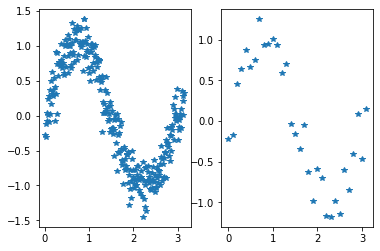

In [3]:
train_data = pd.read_csv('trainRegression.csv')
test_data = pd.read_csv('testRegression.csv')

# train_data.head()
#print (data['X'])
figure, axis = plt.subplots(1,2)

axis[0].plot(train_data['X'],train_data['R'],'*')
axis[1].plot(test_data['X'], test_data['R'], '*')

#type(data)

# to convert data into Numpy Array
numpy_train_data = train_data.values
numpy_test_data = test_data.values

N = len(numpy_train_data)
N2 = len(numpy_test_data)

In [7]:
def graph(X,Y,YPrime,T):
    plt.xlabel("input")
    plt.ylabel("output")
    plt.title(T)
    
    plt.plot(X,Y,'*', label = 'Orignal')
    plt.plot(X,YPrime,'+', label = 'Predicted')
    plt.legend()
    plt.show()
    
def mean_square_err(YPrime, Y, N):
    sumE = np.sum(np.square(YPrime - Y))
    J = sumE / (2 * N)
    return J

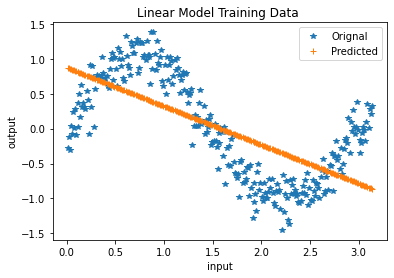

Mean Square Error For Linear Model Training Data =  0.14953637691472502


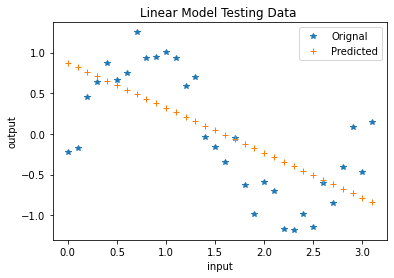

Mean Square Error For Linear Model Testing  Data =  0.1579660860229887


In [8]:
def linear_model():
    #      A             X     =   B
    #[N       sumX ] [Theta0]  = [sumY]
    #[sumX    sumX2] [Theta1]  = [sumXY]
    
    #PredictY = YPRIME = theta0 + theta1X
    

    #TRAINING INPUT & OUTPUT
    X = numpy_train_data[:,0]
    Y = numpy_train_data[:,1]
    
    #COMPUTING CELLS FOR MATRIX A
    sumX = np.sum(X)
    sumX2 = np.sum(np.square(X))
    
    #COMPUTING CELLS FOR MATRIX B
    sumY = np.sum(Y)
    sumXY = np.sum(np.multiply(X,Y))
    
    #MATRIX A , B
    A = np.array([[N,sumX], [sumX,sumX2]])
    B = np.array([[sumY], [sumXY]])
    
    #MATRIX X
    T = np.dot(np.linalg.inv(A), B)

    #Theta values
    theta0 = T[0][0]
    theta1 = T[1][0]
    
    
    #PREDICTION ON TRAINED DATA 
    predict_train_Y = theta0 + theta1 * X
    graph(X,Y,predict_train_Y, "Linear Model Training Data ")
    
    
    #MSE FOR TRAINED DATA 
    JOrignal = mean_square_err(predict_train_Y, Y, N)
    print("Mean Square Error For Linear Model Training Data = ", JOrignal)
    
    
    
    #PREDICTION ON TESTING DATA 
    test_X = numpy_test_data[:,0]
    test_Y = numpy_test_data[:,1]
    predict_test_Y = theta0 + theta1 * test_X
    graph(test_X,test_Y,predict_test_Y, "Linear Model Testing Data ")
    
    
    #MSE FOR TESTING DATA 
    JTest = mean_square_err(predict_test_Y, test_Y, N2)
    print("Mean Square Error For Linear Model Testing  Data = ", JTest)
    
#     print(A.shape)
#     print(B.shape)
#     print(X.shape)
    
#     print("A\n", A)
#     print("B\n", B)
#     print("X\n", X)
#     print(theta0)
#     print(theta1)
    

#MAIN
linear_model()

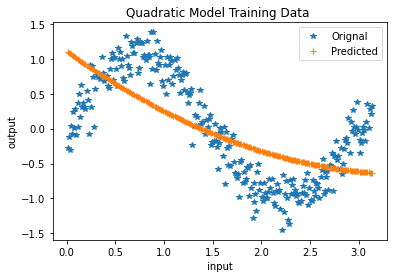

Mean Square Error For Quadratic Model Training Data =  0.14413528518661506


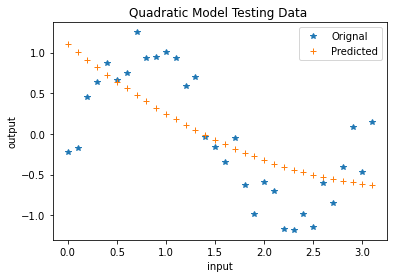

Mean Square Error For Quadratic Model Testing  Data =  0.16302089797481426


In [9]:
def quadratic_model():
    #      A                      X     =   B
    #[N       sumX     sumX2] [Theta0]  = [sumY]
    #[sumX    sumX2    sumX3] [Theta1]  = [sumXY]
    #[sumX2   sumX3    sumX4] [Theta2]  = [sumX2Y]
    
    #PredictY = YPRIME = theta0 + theta1X + theta2X2
    

    #TRAINING INPUT & OUTPUT
    X = numpy_train_data[:,0]
    Y = numpy_train_data[:,1]
    
    #COMPUTING CELLS FOR MATRIX A
    sumX  = np.sum(X)
    sumX2 = np.sum(np.square(X))
    sumX3 = np.sum(np.power(X,3))
    sumX4 = np.sum(np.power(X,4))
    
    #COMPUTING CELLS FOR MATRIX B
    sumY = np.sum(Y)
    sumXY = np.sum(np.multiply(X,Y))
    sumX2Y = np.sum(np.multiply(np.square(X),Y))
    
    #MATRIX A , B
    A = np.array([[N,sumX, sumX2], [sumX,sumX2, sumX3],[sumX2,sumX3,sumX4]])
    B = np.array([[sumY], [sumXY], [sumX2Y]])
    
    #MATRIX X
    T = np.dot(np.linalg.inv(A), B)
    
    #Theta values
    theta0 = T[0][0]
    theta1 = T[1][0]
    theta2 = T[2][0]
    
    
    #PREDICTION ON TRAINED DATA 
    predict_train_Y = theta0 + (theta1 * X) + (theta2 * np.square(X))
    graph(X,Y,predict_train_Y, "Quadratic Model Training Data ")

    
    #MSE FOR TRAINED DATA 
    JOrignal = mean_square_err(predict_train_Y, Y,N)
    print("Mean Square Error For Quadratic Model Training Data = ", JOrignal)
    
    
    
    #PREDICTION ON TESTING DATA 
    test_X = numpy_test_data[:,0]
    test_Y = numpy_test_data[:,1]
    predict_test_Y = theta0 + (theta1 * test_X) + (theta2 * np.square(test_X))
    graph(test_X,test_Y,predict_test_Y, "Quadratic Model Testing Data ")
    
    
    #MSE FOR TESTING DATA 
    JTest = mean_square_err(predict_test_Y, test_Y,N2)
    print("Mean Square Error For Quadratic Model Testing  Data = ", JTest)
    
    

#MAIN
quadratic_model()

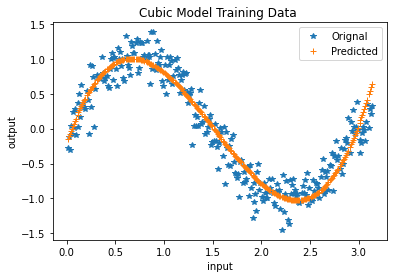

Mean Square Error For Cubic Model Training Data =  0.02483012768110781


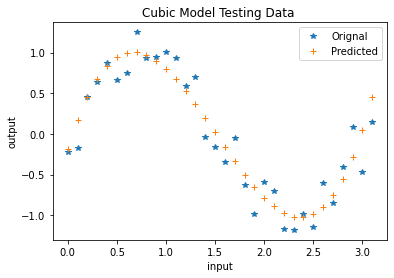

Mean Square Error For Cubic Model Testing  Data =  0.02577102884547801


In [10]:
def cubic_model():
    #      A                               X     =   B
    #[N       sumX     sumX2    sumX3] [Theta0]  = [sumY]
    #[sumX    sumX2    sumX3    sumX4] [Theta1]  = [sumXY]
    #[sumX2   sumX3    sumX4    sumX5] [Theta2]  = [sumX2Y]
    #[sumX3   sumX4    sumX5    sumX6] [Theta3]  = [sumX3Y]
    
    #PredictY = YPRIME = theta0 + theta1.X + theta2.X2 + theta3.X3
    
    #TRAINING INPUT & OUTPUT
    X = numpy_train_data[:,0]
    Y = numpy_train_data[:,1]
    
    #COMPUTING CELLS FOR MATRIX A
    sumX  = np.sum(X)
    sumX2 = np.sum(np.square(X))
    sumX3 = np.sum(np.power(X,3))
    sumX4 = np.sum(np.power(X,4))
    sumX5 = np.sum(np.power(X,5))
    sumX6 = np.sum(np.power(X,6))
    
    #COMPUTING CELLS FOR MATRIX B
    sumY = np.sum(Y)
    sumXY = np.sum(np.multiply(X,Y))
    sumX2Y = np.sum(np.multiply(np.square(X),Y))
    sumX3Y = np.sum(np.multiply(np.power(X,3),Y))
    
    #MATRIX A , B
    A = np.array([[N,sumX, sumX2, sumX3], [sumX,sumX2, sumX3,sumX4],[sumX2,sumX3,sumX4,sumX5],[sumX3,sumX4,sumX5,sumX6]])
    B = np.array([[sumY], [sumXY], [sumX2Y],[sumX3Y]])
    
    #MATRIX X
    T = np.dot(np.linalg.inv(A), B)
    
    #Theta values
    theta0 = T[0][0]
    theta1 = T[1][0]
    theta2 = T[2][0]
    theta3 = T[3][0]
    
    
    #PREDICTION ON TRAINED DATA 
    predict_train_Y = theta0 + (theta1 * X) + (theta2 * np.square(X)) + (theta3 * np.power(X,3))
    graph(X,Y,predict_train_Y, "Cubic Model Training Data ")
    
    
    #MSE FOR TRAINED DATA 
    JOrignal = mean_square_err(predict_train_Y, Y,N)
    print("Mean Square Error For Cubic Model Training Data = ", JOrignal)
    
    
    
    #PREDICTION ON TESTING DATA 
    test_X = numpy_test_data[:,0]
    test_Y = numpy_test_data[:,1]
    predict_test_Y = theta0 + (theta1 * test_X) + (theta2 * np.square(test_X)) + (theta3 * np.power(test_X,3))
    graph(test_X,test_Y,predict_test_Y, "Cubic Model Testing Data ")
    
    
    #MSE FOR TESTING DATA 
    JTest = mean_square_err(predict_test_Y, test_Y, N2)
    print("Mean Square Error For Cubic Model Testing  Data = ", JTest)
    
    

#MAIN
cubic_model()

In [11]:
#COMMENTS ON RESULT

print("1. Cubic Model Gives the Best results for Training and Testing Data, i.e its MSE Is lowest !")

1. Cubic Model Gives the Best results for Training and Testing Data, i.e its MSE Is lowest !
